## Final Project
#### Names: Sammy Park and Victoria Ok

### Spotify Tracks Dataset from huggingface.co
(https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)

### Data Description:
The dataset comprises information on various music tracks available on Spotify, encompassing diverse attributes such as artist details, album names, track names, popularity scores, duration, explicit content, and musical traits like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, and track genre. The popularity score, ranging from 0 to 100, is algorithmically determined based on the track's play count and recency. Additionally, the dataset includes details about the presence of explicit lyrics, dance suitability, acoustic nature, instrumental content, live performance likelihood, and the emotional tone conveyed by each track. 

### Basic Information about the Data:
- size: 17.5+ MB
- number of entries (rows): 114,000
- number of features (columns): 21
- number of categorical columns: 6
- number of numerical columns: 15
- columns with missing values: `artists`, `album_name`, `track_name`

### Key Variables:

- `track_genre`: The genre in which the track belongs
- `popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular, calculated algorithmically based on the total plays and recency of a track. Current plays contribute more to higher popularity. Duplicate tracks are independently rated, and artist/album popularity is derived from track popularity.
- `duration_ms`: The track length in milliseconds
- `explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- `loudness`: The overall loudness of a track in decibels (dB)
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- `speechiness`: Speechiness measures the presence of spoken words in a track. A value close to 1.0 indicates exclusively spoken content, with values above 0.66 suggesting entirely spoken tracks. Values between 0.33 and 0.66 indicate a mix of music and speech, such as rap, while values below 0.33 likely represent non-speech-like music tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM).
- `time_signature`: An estimated time signature. The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

### Question: 
#### Can we predict the popularity of songs based on their musical features?

(duration, explicitness, danceability, energy, key, loudness, modality of the track, speech presence, acousticness, instrumentalness, liveness, valence, tempo, and time signature)

### Goal:
#### To develop a predictive model for song popularity, aiming to assess and compare the popularity of a user's top 10 songs based on their musical features in relation to the top tracks.

### Load Libraries & Data

In [1]:
### Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for data pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Libraries for kMeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Libraries for random forest
from sklearn.ensemble import RandomForestClassifier

# Libraries for model evaluation and metrics
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
### Load and preview the dataset
# spotify = pd.read_csv("/Users/SammyCPark/Desktop/DS3001/DS-3001/spotify_dataset.csv") # Sammy path
spotify = pd.read_csv("C:/Users/victo/Downloads/Yr. 4 Sem. 1/DS 3001 FML/ds3001-final-project/dataset.csv") # Victoria path
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Data Cleaning

In [3]:
# Drop the index column, as it is an unnecessary column
# Drop the track_id column, because it is a unique identifier 
spotify = spotify.drop(['index', 'track_id'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [4]:
# Convert 'duration_ms' into 'duration_sec' (ms to s) for user readability
spotify['duration_sec'] = spotify['duration_ms']/1000
spotify = spotify.drop(['duration_ms'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

In [5]:
# See how many categories exist in track_genre (114)
genres = spotify["track_genre"].value_counts()
genres

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [6]:
# Compress track_genre into smaller categories
def categorize_genre(genre):
    if genre in ["hip-hop", "power-pop", "pop-film", "pop", "mandopop", "k-pop", "j-pop", "j-idol", "cantopop"]:
        return "Pop_HipHop"
    elif genre in ["electronic", "electro", "edm", "dub", "dubstep", "groove", "idm", "breakbeat", "minimal-techno", "techno", "synth-pop", "detroit-techno", "party", "club"]:
        return "Electronic"
    elif genre in ["progressive-house", "afrobeat", "house", "chicago-house", "drum-and-bass", "tango", "reggaeton", "reggae", "disco", "deep-house", "dancehall", "dance", "funk", "garage", "samba", "salsa", "trance"]:
        return "Dance"
    elif genre in ["mpb", "malay", "latino", "latin", "j-rock", "j-dance", "world-music", "german", "french", "british", "brazil", "iranian", "turkish", "anime", "forro", "sertanejo", "indian", "swedish", "spanish", "trip-hop", "pagode", "ska"]:
        return "World"
    elif genre in ["songwriter", "singer-songwriter", "indie-pop", "indie", "bluegrass", "folk", "country", "honky-tonk", "alternative"]:
        return "Indie_Country"
    elif genre in ["punk", "metalcore", "metal", "psych-rock", "punk-rock", "heavy-metal", "hardstyle", "hardcore", "hard-rock", "black-metal", "alt-rock", "rockabilly", "rock-n-roll", "rock", "death-metal", "grunge", "grindcore", "goth", "emo", "industrial"]:
        return "Metal_Rock"
    elif genre in ["acoustic", "piano", "jazz", "blues", "r-n-b", "ambient", "soul", "guitar", "gospel", "opera", "classical"]:
        return "Blues_Instrumental"
    elif genre in ["kids", "study", "sleep", "show-tunes", "disney", "comedy", "children", "sad", "romance", "happy", "chill", "new-age"]:
        return "Tunes"

In [7]:
# Apply the categorization function to the 'track_genre' column
# spotify['genre_condensed'] = spotify['track_genre'].apply(categorize_genre).astype("category")
spotify['track_genre'] = spotify['track_genre'].apply(categorize_genre).astype("category")

In [ ]:
# # drop the "track_genre" column as it's not necessary anymore
# spotify = spotify.drop(columns=["track_genre"])

In [8]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  object  
 1   album_name        113999 non-null  object  
 2   track_name        113999 non-null  object  
 3   popularity        114000 non-null  int64   
 4   explicit          114000 non-null  bool    
 5   danceability      114000 non-null  float64 
 6   energy            114000 non-null  float64 
 7   key               114000 non-null  int64   
 8   loudness          114000 non-null  float64 
 9   mode              114000 non-null  int64   
 10  speechiness       114000 non-null  float64 
 11  acousticness      114000 non-null  float64 
 12  instrumentalness  114000 non-null  float64 
 13  liveness          114000 non-null  float64 
 14  valence           114000 non-null  float64 
 15  tempo             114000 non-null  float64 
 16  ti

In [ ]:
# # Convert 'track_genre' into a category type
# spotify["track_genre"] = spotify["track_genre"].astype("category")

In [106]:
# One hot encoding track_genre 
ordinal_encoder = OrdinalEncoder()
spotify[['track_genre']] = ordinal_encoder.fit_transform(spotify[['track_genre']])
spotify[['track_genre']].value_counts()

track_genre
7.0            20446
4.0            16663
1.0            15184
2.0            12269
6.0            11497
0.0            10196
5.0             8279
3.0             6784
Name: count, dtype: int64

In [10]:
# View the encoded categories of track_genre
ordinal_encoder.categories_

[array(['Blues_Instrumental', 'Dance', 'Electronic', 'Indie_Country',
        'Metal_Rock', 'Pop_HipHop', 'Tunes', 'World'], dtype=object)]

In [11]:
# view the null rows
spotify[spotify.isna().any(axis=1)]

artists album_name track_name  popularity  explicit  danceability  \
65900     NaN        NaN        NaN           0     False         0.501   

       energy  key  loudness  mode  speechiness  acousticness  \
65900   0.583    7     -9.46     0       0.0605          0.69   

       instrumentalness  liveness  valence    tempo  time_signature  \
65900           0.00396    0.0747    0.734  138.391               4   

       track_genre  duration_sec  
65900          5.0           0.0

In [12]:
# Drop the one value that has null values
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   explicit          113999 non-null  bool   
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  float64
 16  time_signature    113999 

## Exploratory Data Analysis

In [13]:
# Output basic statistics from the numerical features
spotify.describe()

popularity   danceability         energy            key  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean       33.238827       0.566801       0.641383       5.309126   
std        22.304959       0.173543       0.251530       3.559999   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.456000       0.472000       2.000000   
50%        35.000000       0.580000       0.685000       5.000000   
75%        50.000000       0.695000       0.854000       8.000000   
max       100.000000       0.985000       1.000000      11.000000   

            loudness           mode    speechiness   acousticness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean       -8.258950       0.637558       0.084652       0.314907   
std         5.029357       0.480708       0.105733       0.332522   
min       -49.531000       0.000000       0.000000       0.000000   
25%       -10.013000       0.000000       0.035900       0.016900   
50%        -7.004000       1.000000       0.048900       0.169000   
75%        -5.003000       1.000000       0.084500       0.597500   
max         4.532000       1.000000       0.965000       0.996000   

       instrumentalness       liveness        valence          tempo  \
count     113999.000000  113999.000000  113999.000000  113999.000000   
mean           0.156051       0.213554       0.474066     122.147695   
std            0.309556       0.190378       0.259261      29.978290   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.098000       0.260000      99.218500   
50%            0.000042       0.132000       0.464000     122.017000   
75%            0.049000       0.273000       0.683000     140.071000   
max            1.000000       1.000000       0.995000     243.372000   

       time_signature    track_genre   duration_sec  
count   113999.000000  113999.000000  113999.000000  
mean         3.904034       3.710515     228.031153  
std          0.432623       2.368390     107.296058  
min          0.000000       0.000000       8.586000  
25%          4.000000       2.000000     174.066000  
50%          4.000000       4.000000     212.906000  
75%          4.000000       6.000000     261.506000  
max          5.000000       7.000000    5237.295000

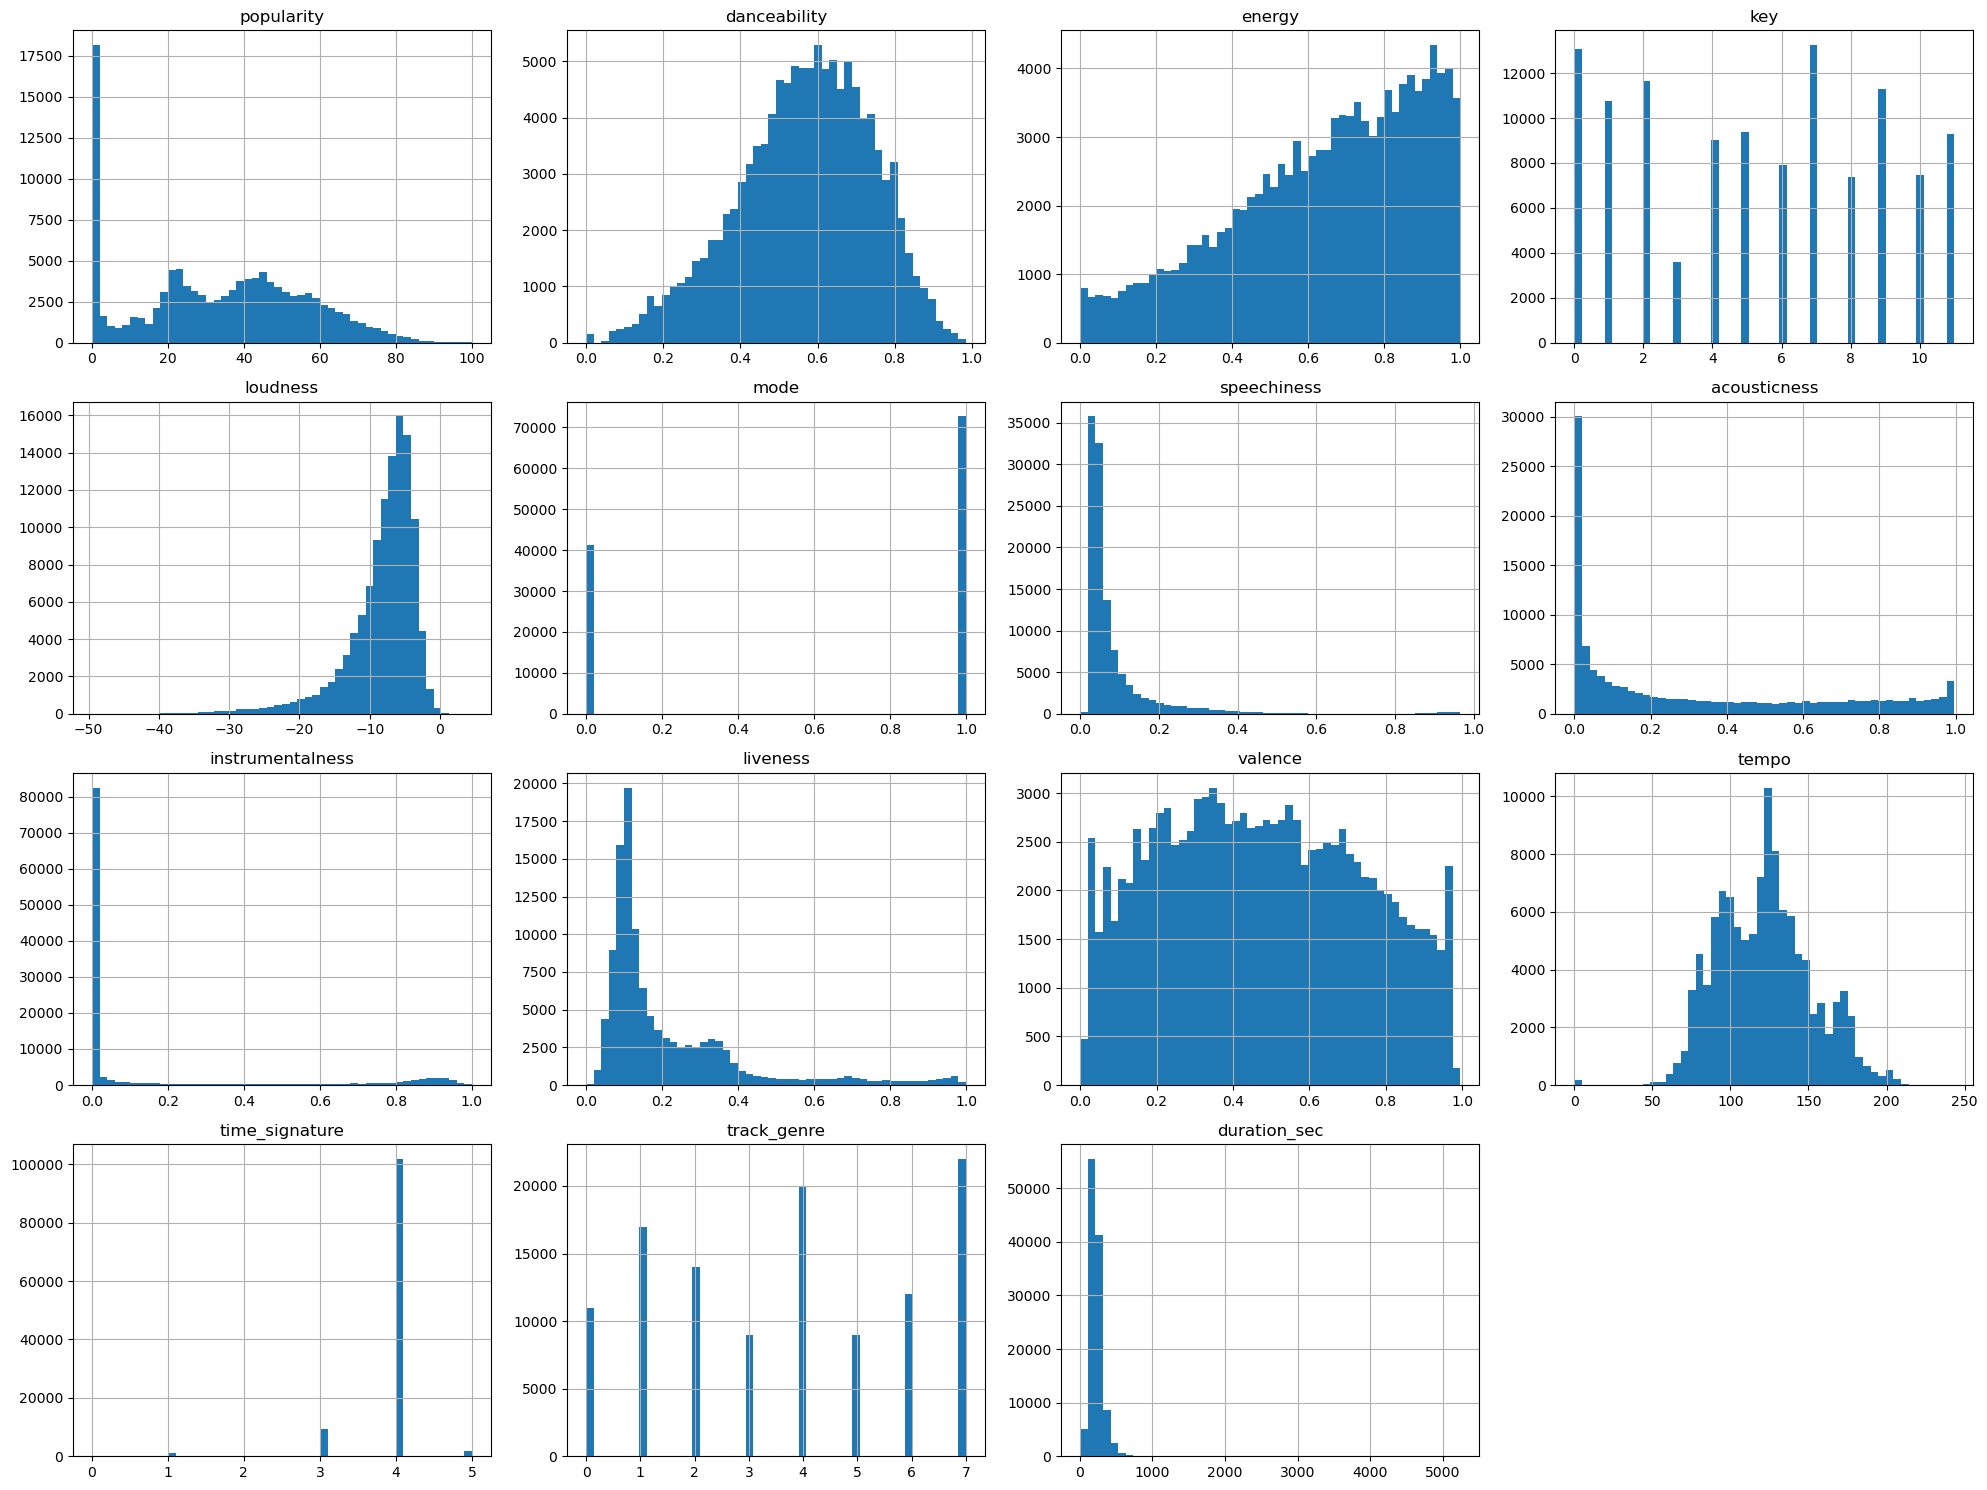

In [14]:
# Visualize numerical data as histograms to understand general distributions
spotify.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# TODO: add comments on the histogram

In [ ]:
# spotify[['genre_condensed']] = OrdinalEncoder().fit_transform(spotify[['genre_condensed']])
# spotify[['genre_condensed']].value_counts()

#### Correlations

On the first 10,000 samples in the dataset

In [15]:
spotify_num_corr = spotify.drop(columns=['artists','album_name','track_name'], axis=1)[0:10000]

In [16]:
correlations = spotify_num_corr.corr()
correlations.shape

(16, 16)

In [17]:
correlations["popularity"].sort_values(ascending=False)

popularity          1.000000
track_genre         0.111344
acousticness        0.080126
instrumentalness    0.003581
time_signature     -0.001797
danceability       -0.004493
duration_sec       -0.009828
explicit           -0.020955
mode               -0.027280
liveness           -0.028156
tempo              -0.029629
speechiness        -0.030639
key                -0.036528
loudness           -0.093751
energy             -0.151171
valence            -0.156951
Name: popularity, dtype: float64

array([[<Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='loudness', ylabel='popularity'>,
        <Axes: xlabel='valence', ylabel='popularity'>,
        <Axes: xlabel='energy', ylabel='popularity'>],
       [<Axes: xlabel='popularity', ylabel='loudness'>,
        <Axes: xlabel='loudness', ylabel='loudness'>,
        <Axes: xlabel='valence', ylabel='loudness'>,
        <Axes: xlabel='energy', ylabel='loudness'>],
       [<Axes: xlabel='popularity', ylabel='valence'>,
        <Axes: xlabel='loudness', ylabel='valence'>,
        <Axes: xlabel='valence', ylabel='valence'>,
        <Axes: xlabel='energy', ylabel='valence'>],
       [<Axes: xlabel='popularity', ylabel='energy'>,
        <Axes: xlabel='loudness', ylabel='energy'>,
        <Axes: xlabel='valence', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>]], dtype=object)

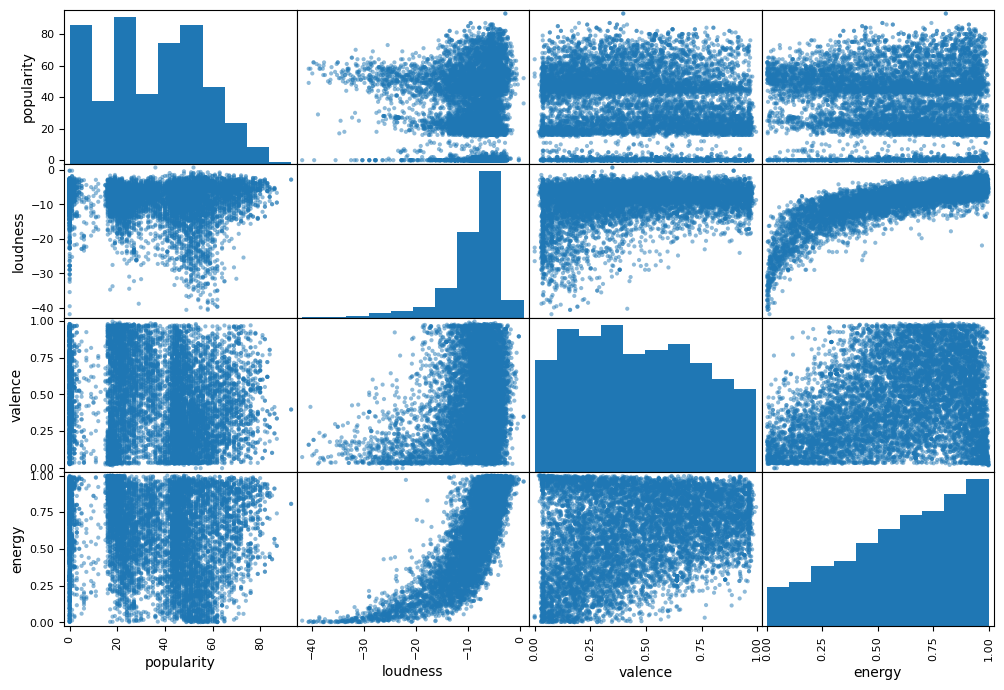

In [18]:
from pandas.plotting import scatter_matrix

# plot the correlations for the highest correlations
attributes = ["popularity", "loudness", "valence", "energy"]
scatter_matrix(spotify_num_corr[attributes], figsize=(12, 8))

In [19]:
# viewing the histogram, we saw that many songs had a popularity of 0, and wanted to investigate
zero_pop = spotify[(spotify['popularity']==0)]
zero_pop

artists                          album_name  \
23                          Jason Mraz                       Coffee Moment   
24                          Jason Mraz        Human - Best Adult Pop Tunes   
26                          Jason Mraz               Holly Jolly Christmas   
27                          Jason Mraz  Feeling Good - Adult Pop Favorites   
28                          Jason Mraz                      Christmas Time   
...                                ...                                 ...   
113046                 Rend Collective              Santa's Christmas List   
113047                Kim Walker-Smith              Santa's Christmas List   
113048                Kim Walker-Smith              Santa's Christmas List   
113049  Rend Collective;We The Kingdom              Santa's Christmas List   
113099           Bryan & Katie Torwalt              Santa's Christmas List   

                                               track_name  popularity  \
23                                       93 Million Miles           0   
24                                               Unlonely           0   
26                                      Winter Wonderland           0   
27                                         If It Kills Me           0   
28                                      Winter Wonderland           0   
...                                                   ...         ...   
113046  Ding Dong Merrily On High (The Celebration's S...           0   
113047                     Rudolph The Red-Nosed Reindeer           0   
113048                         I'll Be Home For Christmas           0   
113049           God Rest Ye Merry Gentlemen (Hallelujah)           0   
113099        It's Beginning To Look A Lot Like Christmas           0   

        explicit  danceability  energy  key  loudness  mode  speechiness  \
23         False         0.572   0.454    3   -10.286     1       0.0258   
24         False         0.796   0.667    5    -4.831     0       0.0392   
26         False         0.620   0.309    5    -9.209     1       0.0495   
27         False         0.633   0.429    4    -6.784     0       0.0381   
28         False         0.620   0.309    5    -9.209     1       0.0495   
...          ...           ...     ...  ...       ...   ...          ...   
113046     False         0.696   0.715    7    -7.741     1       0.0314   
113047     False         0.581   0.436    8    -7.936     1       0.0443   
113048     False         0.413   0.437    1    -7.983     0       0.0327   
113049     False         0.607   0.884    2    -4.059     1       0.0489   
113099     False         0.412   0.340    4    -6.243     1       0.0339   

        acousticness  instrumentalness  liveness  valence    tempo  \
23            0.4770          0.000014    0.0974    0.515  140.182   
24            0.3810          0.000000    0.2210    0.754   97.988   
26            0.7880          0.000000    0.1460    0.664  145.363   
27            0.0444          0.000000    0.1320    0.520  143.793   
28            0.7880          0.000000    0.1460    0.664  145.363   
...              ...               ...       ...      ...      ...   
113046        0.3400          0.000000    0.1800    0.959  130.021   
113047        0.2320          0.000000    0.0547    0.412  120.138   
113048        0.0420          0.000036    0.1460    0.102  120.259   
113049        0.0230          0.000000    0.2260    0.555  139.988   
113099        0.4070          0.000000    0.4040    0.412   92.460   

        time_signature  track_genre  duration_sec  
23                   4          0.0       216.386  
24                   4          0.0       231.266  
26                   4          0.0       131.760  
27                   4          0.0       273.653  
28                   4          0.0       131.760  
...                ...          ...           ...  
113046               4          7.0       117.226  
113047               4          7.0       175.4

There doesn't seem to be any glaring patterns (ex. track's audio features all being 0), so we will leave these be.

Viewing the statistics of our target variable, we want to categorize the popularity variable into 3 classes: low, average, and high popularity. To make each class balanced (to prevent misleading accuracy scores). 

In [20]:
print("33rd: ", np.percentile(spotify['popularity'], 33))
print("67rd: ", np.percentile(spotify['popularity'], 67))

33rd:  22.0
67rd:  45.0


We will split the data as:
- Low: 0 - 33
- Average: 33 - 67
- High: 67 - 100

In [21]:
# Factor popularity to 3 levels of low, average, and high to create our classifier variable
spotify['popularity'] = spotify.popularity.apply(lambda x: "low" if x <= 22
                                                         else ("average" if (x > 22 and x <=45)
                                                         else "high")).astype("category")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  object  
 1   album_name        113999 non-null  object  
 2   track_name        113999 non-null  object  
 3   popularity        113999 non-null  category
 4   explicit          113999 non-null  bool    
 5   danceability      113999 non-null  float64 
 6   energy            113999 non-null  float64 
 7   key               113999 non-null  int64   
 8   loudness          113999 non-null  float64 
 9   mode              113999 non-null  int64   
 10  speechiness       113999 non-null  float64 
 11  acousticness      113999 non-null  float64 
 12  instrumentalness  113999 non-null  float64 
 13  liveness          113999 non-null  float64 
 14  valence           113999 non-null  float64 
 15  tempo             113999 non-null  float64 
 16  time_si

Duplicates, based on the documentation are the same tracks, but either from a single or an album. We have decided to drop any duplicates because the only difference between the two samples would essentially be the album name. 

In [22]:
# identify the rows that are duplicated
duplicated = spotify.duplicated()
duplicate_indices = duplicated.index[duplicated == True].tolist()
len(duplicate_indices)

12681

In [23]:
# drop the duplicated samples
spotify = spotify.drop(duplicate_indices)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101318 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           101318 non-null  object  
 1   album_name        101318 non-null  object  
 2   track_name        101318 non-null  object  
 3   popularity        101318 non-null  category
 4   explicit          101318 non-null  bool    
 5   danceability      101318 non-null  float64 
 6   energy            101318 non-null  float64 
 7   key               101318 non-null  int64   
 8   loudness          101318 non-null  float64 
 9   mode              101318 non-null  int64   
 10  speechiness       101318 non-null  float64 
 11  acousticness      101318 non-null  float64 
 12  instrumentalness  101318 non-null  float64 
 13  liveness          101318 non-null  float64 
 14  valence           101318 non-null  float64 
 15  tempo             101318 non-null  float64 
 16  time_si

In [24]:
# Check that all duplicates were removed
spotify.duplicated().index[spotify.duplicated() == True].tolist()

[]

We now have 101,318 samples in our dataset

In [25]:
# Check how many samples are in each population category
spotify[['popularity']].value_counts()

popularity
average       36254
low           33802
high          31262
Name: count, dtype: int64

In [26]:
# One hot encoding popularity for classification
spotify[['popularity']] = OrdinalEncoder().fit_transform(spotify[['popularity']])
spotify[['popularity']].value_counts()

popularity
0.0           36254
2.0           33802
1.0           31262
Name: count, dtype: int64

- 0 corresponds with average popularity
- 1 corresponds with high popularity
- 2 corresponds with low popularity

## Methods

### kMeans Clustering
Employ kMeans clustering as a data exploration technique to uncover underlying patterns and structures within the dataset, allowing for the identification of general trends, associations, or distinctive patterns in the data.

In [27]:
# Subset data without the artist, album name, and track name to create numerical dataset
spotify_num = spotify.drop(columns=['artists','album_name','track_name'], axis=1)
spotify_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101318 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        101318 non-null  float64
 1   explicit          101318 non-null  bool   
 2   danceability      101318 non-null  float64
 3   energy            101318 non-null  float64
 4   key               101318 non-null  int64  
 5   loudness          101318 non-null  float64
 6   mode              101318 non-null  int64  
 7   speechiness       101318 non-null  float64
 8   acousticness      101318 non-null  float64
 9   instrumentalness  101318 non-null  float64
 10  liveness          101318 non-null  float64
 11  valence           101318 non-null  float64
 12  tempo             101318 non-null  float64
 13  time_signature    101318 non-null  int64  
 14  track_genre       101318 non-null  float64
 15  duration_sec      101318 non-null  float64
dtypes: bool(1), float64(12), 

In [28]:
# Scale the data for kmeans
spotify_scaled_kmeans = pd.DataFrame(MinMaxScaler().fit_transform(spotify_num))

In [29]:
# Run data through kmeans model for 3 clusters
spotify_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(spotify_scaled_kmeans)

In [30]:
# see what the model labeled the training dataset
spotify_kmeans.labels_

array([1, 2, 2, ..., 1, 0, 1])

In [31]:
spotify_kmeans.predict(spotify_scaled_kmeans)

array([1, 2, 2, ..., 1, 0, 1])

Text(0, 0.5, 'loudness')

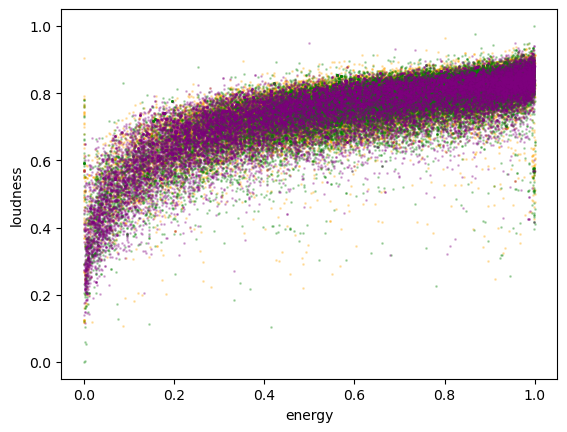

In [32]:
group1 = spotify_scaled_kmeans[spotify_kmeans.labels_ == 0]
group2= spotify_scaled_kmeans[spotify_kmeans.labels_ == 1]
group3 = spotify_scaled_kmeans[spotify_kmeans.labels_ == 2]

plt.scatter(group1[3], group1[5], c="orange", s=1, alpha=0.25)
plt.scatter(group2[3], group2[5], c="green", s=1, alpha=0.25)
plt.scatter(group3[3], group3[5], c="purple", s=1, alpha=0.25)
plt.xlabel("energy")
plt.ylabel("loudness")

Text(0, 0.5, 'valence')

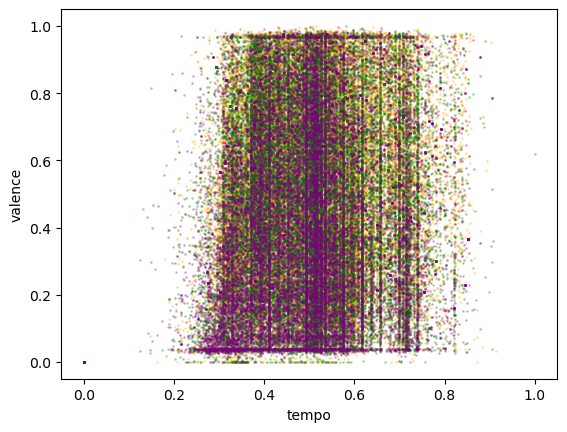

In [33]:
plt.scatter(group1[12], group1[11], c="orange", s=1, alpha=0.25)
plt.scatter(group2[12], group2[11], c="green", s=1, alpha=0.25)
plt.scatter(group3[12], group3[11], c="purple", s=1, alpha=0.25)
plt.xlabel("tempo")
plt.ylabel("valence")

### Random Forest 
Apply Random Forest to establish a predictive model for song popularity, enabling the assessment and comparison of a user's top 10 songs based on their musical features and their relation to top tracks.

In [34]:
# split the data into predictors and labels
X = spotify.drop(columns=["popularity"], axis=1)
y = spotify['popularity']

In [35]:
# split the data into training and testing sets
# training: 80%
# testing: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) 

In [36]:
# verify that sets were stratified:
print(y_train.value_counts())
print(y_test.value_counts())

popularity
0.0    29003
2.0    27041
1.0    25010
Name: count, dtype: int64
popularity
0.0    7251
2.0    6761
1.0    6252
Name: count, dtype: int64


In [37]:
# drop the track artist/album information
X_train_new = X_train.drop(columns=['artists', 'album_name', 'track_name'])
X_test_new = X_test.drop(columns=['artists', 'album_name', 'track_name'])

In [38]:
# get a summary of the training dataset (+ verify that drops performed correctly)
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81054 entries, 17229 to 75930
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          81054 non-null  bool   
 1   danceability      81054 non-null  float64
 2   energy            81054 non-null  float64
 3   key               81054 non-null  int64  
 4   loudness          81054 non-null  float64
 5   mode              81054 non-null  int64  
 6   speechiness       81054 non-null  float64
 7   acousticness      81054 non-null  float64
 8   instrumentalness  81054 non-null  float64
 9   liveness          81054 non-null  float64
 10  valence           81054 non-null  float64
 11  tempo             81054 non-null  float64
 12  time_signature    81054 non-null  int64  
 13  track_genre       81054 non-null  float64
 14  duration_sec      81054 non-null  float64
dtypes: bool(1), float64(11), int64(3)
memory usage: 9.4 MB


In [39]:
# get a summary of the training dataset (+ verify that drops performed correctly)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20264 entries, 96506 to 106520
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          20264 non-null  bool   
 1   danceability      20264 non-null  float64
 2   energy            20264 non-null  float64
 3   key               20264 non-null  int64  
 4   loudness          20264 non-null  float64
 5   mode              20264 non-null  int64  
 6   speechiness       20264 non-null  float64
 7   acousticness      20264 non-null  float64
 8   instrumentalness  20264 non-null  float64
 9   liveness          20264 non-null  float64
 10  valence           20264 non-null  float64
 11  tempo             20264 non-null  float64
 12  time_signature    20264 non-null  int64  
 13  track_genre       20264 non-null  float64
 14  duration_sec      20264 non-null  float64
dtypes: bool(1), float64(11), int64(3)
memory usage: 2.3 MB


Create a basic model

In [40]:
RFC = RandomForestClassifier(
        n_estimators = 1000, 
        max_features = 4, # square root of number of features
        bootstrap = True, 
        max_samples = 10000, 
        oob_score = True, 
        random_state = 42,
        n_jobs = -1,
        verbose = True
)

In [41]:
# fit the classifier on the training set
spotify_RFC = RFC.fit(X_train_new, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.8s finished


In [42]:
# get the predictions of the model on the training set
y_train_pred = spotify_RFC.predict(X_train_new)
y_train_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    4.6s finished


array([1., 2., 2., ..., 0., 1., 2.])

## Initial Model Evaluation and Metrics

In [43]:
print("training balanced accuracy: ", metrics.balanced_accuracy_score(y_train, y_train_pred))

training balanced accuracy:  0.7972320681817572


In [44]:
# precision
print("training precision: ", metrics.precision_score(y_train, y_train_pred, average="weighted"))

training precision:  0.799848522193443


In [45]:
# recall
print("training recall: ", metrics.recall_score(y_train, y_train_pred, average='weighted'))

training recall:  0.7992079354504404


In [46]:
# accuracy
print("training accuracy: ", spotify_RFC.score(X_train_new, y_train))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    4.3s


training accuracy:  0.7992079354504404


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    5.2s finished


In [47]:
# out of bag error:
print('training OOB error rate: ' + str(1-spotify_RFC.oob_score_))

training OOB error rate: 0.4035951341081254


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    3.6s finished


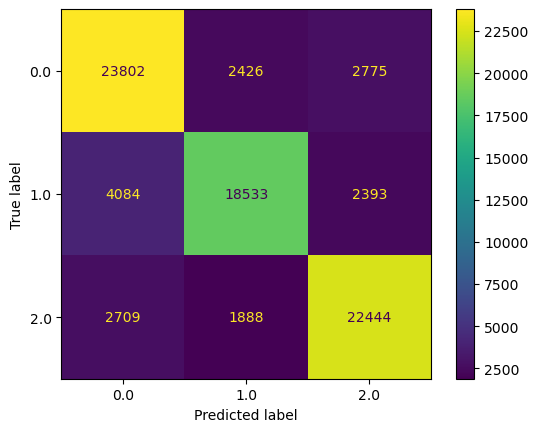

In [48]:
# output the confusion matrix for a visualization
ConfusionMatrixDisplay.from_estimator(spotify_RFC, X_train_new, y_train)

### Hyperparameter Tuning
Find the most optimal values for two hyperparameters: ```n_estimators``` and ```max_features``` to find the best model.

In [49]:
n_estimators_list = [100, 300, 500, 700, 900, 1000]
forest_list = [RandomForestClassifier( 
                n_estimators = n,
                max_features = 4, # square root of number of features
                bootstrap = True, 
                warm_start=True,
                max_samples = 10000, 
                oob_score = True, 
                random_state = 42).fit(X_train_new, y_train) for n in n_estimators_list]

# Take the first three
forest_list[:3]

[RandomForestClassifier(max_features=4, max_samples=10000, oob_score=True,
                        random_state=42, warm_start=True),
 RandomForestClassifier(max_features=4, max_samples=10000, n_estimators=300,
                        oob_score=True, random_state=42, warm_start=True),
 RandomForestClassifier(max_features=4, max_samples=10000, n_estimators=500,
                        oob_score=True, random_state=42, warm_start=True)]

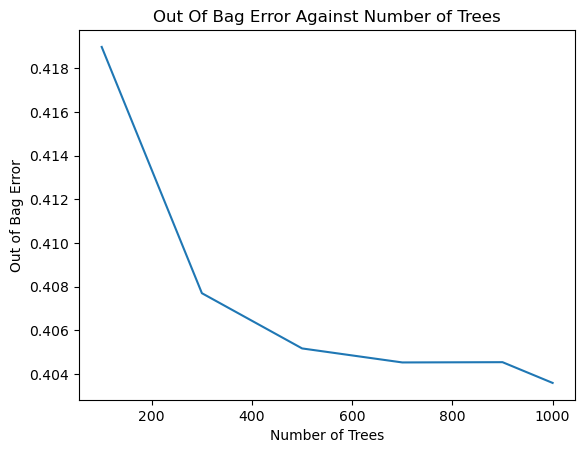

In [50]:
# visualize how the error rate changes as the number of trees increases
oob_errors = ([1-i.oob_score_ for i in forest_list])
plt.plot(n_estimators_list,oob_errors)
plt.title('Out Of Bag Error Against Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag Error')
plt.show()

In [51]:
# view the OOB errors in a table
pd.DataFrame(list(zip(n_estimators_list, oob_errors)), columns = ['number of trees','oob_error'])

number of trees  oob_error
0              100   0.418980
1              300   0.407704
2              500   0.405174
3              700   0.404533
4              900   0.404545
5             1000   0.403595

Making ```n_estimators``` = 1000 has the highest performance

minimize the number of samples the model trained on because it was taking too long :(

In [53]:
max_features_list = [4, 7, 11, 15]

forest_list2 = [RandomForestClassifier(
                n_estimators = 1000, # what we found to be the most optimal
                max_features= n, 
                bootstrap = True, 
                warm_start=True,
                max_samples = 5000, 
                oob_score = True, 
                random_state = 42).fit(X_train_new, y_train) for n in max_features_list]

forest_list2[:3]

[RandomForestClassifier(max_features=4, max_samples=5000, n_estimators=1000,
                        oob_score=True, random_state=42, warm_start=True),
 RandomForestClassifier(max_features=7, max_samples=5000, n_estimators=1000,
                        oob_score=True, random_state=42, warm_start=True),
 RandomForestClassifier(max_features=11, max_samples=5000, n_estimators=1000,
                        oob_score=True, random_state=42, warm_start=True)]

In [54]:
oob_errors1 = ([1 - i.oob_score_ for i in forest_list2])
plt.plot(max_features_list, oob_errors1)
plt.title('Out Of Bag Error Against Number of Trees')
plt.xlabel('max_features_list')
plt.ylabel('Out of Bag Error')
plt.show() 

In [55]:
pd.DataFrame(list(zip(max_features_list, oob_errors1)), columns = ['number of features','oob_error'])

number of features  oob_error
0                   4   0.426099
1                   7   0.427283
2                  11   0.426901
3                  15   0.427616

having 4 features showed to have the smallest OOB error

In [83]:
# create the new model (train on whole dataset)
spotify_RFC_tune = RandomForestClassifier(
                n_estimators = 1000, # what we found to be the most optimal
                max_features= 4, # what we found to be the most optimal
                bootstrap = True, 
                oob_score = True, 
                random_state = 42,
                n_jobs = -1,
                verbose = True)
spotify_RFC_tune


RandomForestClassifier(max_features=4, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=True)

In [84]:
# fit the data
spotify_RF_tuned = spotify_RFC_tune.fit(X_train_new, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.2min finished


In [85]:
print(pd.DataFrame(spotify_RFC.feature_importances_,index = X_train_new.columns, columns=['importance']).sort_values('importance', ascending=False))

                  importance
duration_sec        0.094585
acousticness        0.093384
valence             0.091731
danceability        0.089574
loudness            0.088167
speechiness         0.086638
tempo               0.085999
energy              0.085905
liveness            0.085572
instrumentalness    0.072148
key                 0.050394
track_genre         0.046996
mode                0.013260
time_signature      0.008619
explicit            0.007029


In [86]:
#Here we compute both the mean and standard
# deviation of accumulation of the impurity decrease within each tree.
importances = spotify_RF_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in spotify_RF_tuned.estimators_], axis=0)

#graph it
forest_importances = pd.Series(importances, index=X_train_new.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Evaluate the Final Model on the Test Set

In [87]:
y_test_pred = spotify_RF_tuned.predict(X_test_new)
y_test_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   19.0s finished


array([0., 1., 0., ..., 2., 0., 1.])

In [88]:
print("testing balanced accuracy: ", metrics.balanced_accuracy_score(y_test, y_test_pred))

testing balanced accuracy:  0.638239577114657


In [89]:
# precision
print("testing precision: ", metrics.precision_score(y_test, y_test_pred, average="weighted"))

testing precision:  0.6421978435711213


In [90]:
# recall
print("testing recall: ", metrics.recall_score(y_test, y_test_pred, average='weighted'))

testing recall:  0.6403474141334387


In [91]:
# accuracy
print("testing accuracy: ", spotify_RF_tuned.score(X_test_new, y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.9s


testing accuracy:  0.6403474141334387


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   17.9s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   12.6s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   15.7s finished


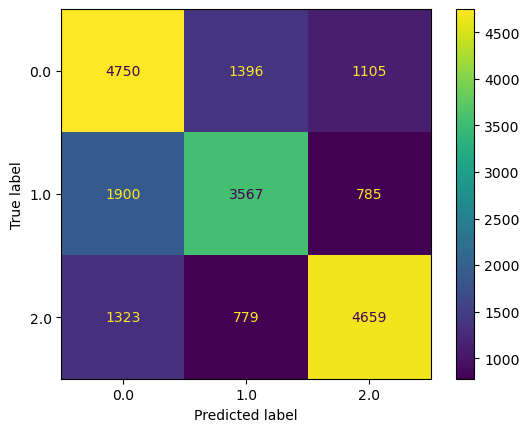

In [92]:
ConfusionMatrixDisplay.from_estimator(spotify_RF_tuned, X_test_new, y_test)

## Application

Apply to our top 10 songs of 2023

In [130]:
# load Sammy's top 10
sammy_top10 = pd.read_csv("C:/Users/victo/Downloads/Yr. 4 Sem. 1/DS 3001 FML/ds3001-final-project/top10_sammy.csv")
# load Victoria's top 10
victoria_top10 = pd.read_csv("C:/Users/victo/Downloads/Yr. 4 Sem. 1/DS 3001 FML/ds3001-final-project/top10_victoria.csv")

In [131]:
sammy_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10 non-null     int64  
 1   artists           10 non-null     object 
 2   album_name        10 non-null     object 
 3   track_name        10 non-null     object 
 4   duration_ms       10 non-null     int64  
 5   explicit          10 non-null     bool   
 6   danceability      10 non-null     float64
 7   energy            10 non-null     float64
 8   key               10 non-null     int64  
 9   loudness          10 non-null     float64
 10  mode              10 non-null     int64  
 11  speechiness       10 non-null     float64
 12  acousticness      10 non-null     float64
 13  instrumentalness  10 non-null     float64
 14  liveness          10 non-null     float64
 15  valence           10 non-null     float64
 16  tempo             10 non-null     float64
 17  

In [132]:
victoria_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10 non-null     int64  
 1   artists           10 non-null     object 
 2   album_name        10 non-null     object 
 3   track_name        10 non-null     object 
 4   duration_ms       10 non-null     int64  
 5   explicit          10 non-null     bool   
 6   danceability      10 non-null     float64
 7   energy            10 non-null     float64
 8   key               10 non-null     int64  
 9   loudness          10 non-null     float64
 10  mode              10 non-null     int64  
 11  speechiness       10 non-null     float64
 12  acousticness      10 non-null     float64
 13  instrumentalness  10 non-null     float64
 14  liveness          10 non-null     float64
 15  valence           10 non-null     float64
 16  tempo             10 non-null     float64
 17  

In [133]:
sammy_top10 = sammy_top10.drop(columns=["index", "artists", "album_name", "track_name"])
victoria_top10 = victoria_top10.drop(columns=["index", "artists", "album_name", "track_name"])

In [134]:
sammy_top10['duration_sec'] = sammy_top10['duration_ms']/1000
sammy_top10 = sammy_top10.drop(['duration_ms'], axis=1)
victoria_top10['duration_sec'] = victoria_top10['duration_ms']/1000
victoria_top10 = victoria_top10.drop(['duration_ms'], axis=1)

In [135]:
sammy_pred = spotify_RF_tuned.predict(sammy_top10)
sammy_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.7s finished


array([1., 1., 1., 1., 1., 1., 2., 1., 1., 1.])

Text(0.5, 1.0, "Sammy's Top 10 Song Popularity Histogram")

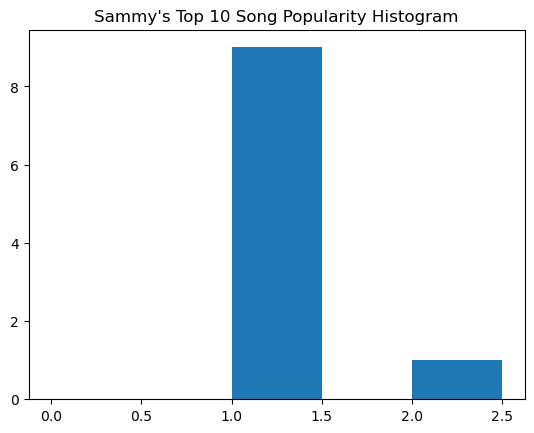

In [155]:
plt.hist(sammy_pred, bins=[0, 0.5, 1, 1.5, 2.0, 2.5])
plt.title("Sammy's Top 10 Song Popularity Histogram") 

Most of the songs that Sammy listens to are considered popular, just one is considered to have low popularity.

In [145]:
from lime import lime_tabular

In [151]:
#Create an explainer object
explainer = lime_tabular.LimeTabularExplainer(sammy_top10.values,feature_names=sammy_top10.columns,class_names=['Low','Average', 'High'],discretize_continuous=True)

#Get the explanation for RF
exp = explainer.explain_instance(sammy_top10.values[0],spotify_RF_tuned.predict_proba,num_features=15)
#next
#Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

c:\Users\victo\anaconda3\envs\fml_new\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    7.8s finished


In [136]:
victoria_pred = spotify_RF_tuned.predict(victoria_top10)
victoria_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished


array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1.])

Text(0.5, 1.0, "Victoria's Top 10 Song Popularity Histogram")

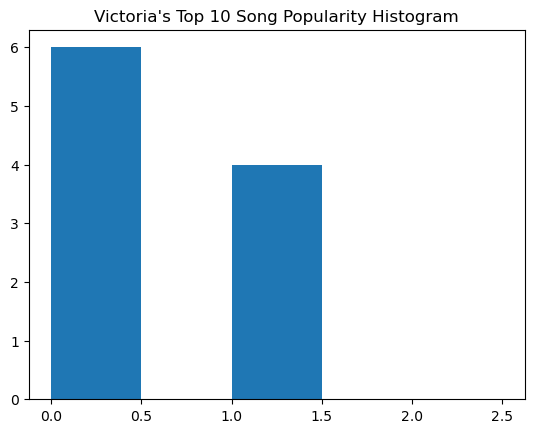

In [154]:
plt.hist(victoria_pred, bins=[0, 0.5, 1, 1.5, 2.0, 2.5])
plt.title("Victoria's Top 10 Song Popularity Histogram") 

The songs that Victoria listens to are almost split evenly between average and high popularity.

Looking at our respective top song

In [152]:
#Create an explainer object
explainer = lime_tabular.LimeTabularExplainer(victoria_top10.values,feature_names=victoria_top10.columns,class_names=['Low','Average', 'High'],discretize_continuous=True)

#Get the explanation for RF
exp = explainer.explain_instance(victoria_top10.values[0],spotify_RF_tuned.predict_proba,num_features=15)
#next
#Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

c:\Users\victo\anaconda3\envs\fml_new\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    7.6s finished


## Future Work/Considerations
While the analysis benefited from variables like duration, explicitness, danceability, and others, limitations arose due to each genre having 1000 tracks, potentially resulting in an incomplete representation. Still, the dataset let us see how songs are somewhat normally distributed in popularity. To further the analysis, exploring user-specific factors (individual preferences, demographics, listening history) and external influences (cultural trends, regional preferences) could enhance the model's accuracy in predicting song popularity for diverse user profiles.
